In [ ]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpllimg
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential
from google.colab.patches import cv2_imshow

Preprocessing

In [ ]:
2# Load images from Drive dir

PATH = "/content/drive/MyDrive/MLNN/screenshots/"
IMG_SIZE = (200, 200)

scaler = StandardScaler()
training = []
files = os.listdir(PATH)

for n in files:
  img_array = cv2.imread(os.path.join(PATH+str(n)), cv2.IMREAD_GRAYSCALE)
  #img_array = cv2.resize(img_array, IMG_SIZE)
  labels = float(str(n).rstrip(" .png"))
  training.append([img_array, labels])
random.shuffle(training)

X = []
Y = []

for img, measures in training:
  X.append(img)
  Y.append(measures)

X = np.array(X).reshape(-1,200,200,1)
Y = np.array(Y).reshape(-1,1)

Y = scaler.fit_transform(Y)

Model

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/MLNN/blank")

In [ ]:
model.save("/content/drive/MyDrive/MLNN/blank")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MLNN/blank/assets


In [ ]:
model = Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (200, 200,1)),
        Conv2D(32, (3, 3), activation = 'relu', name="conv0"),
        MaxPool2D(2,2, name="max0"),  
        Conv2D(64, (3, 3), activation = 'relu', name="conv1"),
        MaxPool2D(2,2, name="max1"),
        Conv2D(128, (3, 3), activation = 'relu', name="conv2"),
        MaxPool2D(2,2, name="max2"),
        Flatten(),
        Dense(1024, activation='relu', name="dense0"),
        Dense(512, activation='relu', name="dense1"),
        Dense(1, activation='linear', name="out"),
], name="CNN_prototype")

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=keras.losses.MeanSquaredError())

In [ ]:
history = model.fit(X, Y, epochs = 30)

Epoch 1/30
4/4 [==============================] - 12s 2s/step - loss: 46.4523
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 1.1741
Epoch 3/30
4/4 [==============================] - 9s 2s/step - loss: 0.9125
Epoch 4/30
4/4 [==============================] - 9s 2s/step - loss: 0.7438
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 0.5255
Epoch 6/30
4/4 [==============================] - 9s 2s/step - loss: 0.2314
Epoch 7/30
4/4 [==============================] - 9s 2s/step - loss: 0.1702
Epoch 8/30
4/4 [==============================] - 9s 2s/step - loss: 0.1278
Epoch 9/30
4/4 [==============================] - 9s 2s/step - loss: 0.1207
Epoch 10/30
4/4 [==============================] - 9s 2s/step - loss: 0.0596
Epoch 11/30
4/4 [==============================] - 9s 2s/step - loss: 0.0434
Epoch 12/30
4/4 [==============================] - 9s 2s/step - loss: 0.0330
Epoch 13/30
4/4 [==============================] - 9s 2s/step - loss: 0.0266
Epoch 

Visualization

In [ ]:
# Plot loss graph

training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
tf.keras.utils.plot_model(model, to_file="/tmp/model.png", show_shapes=True)

Testing

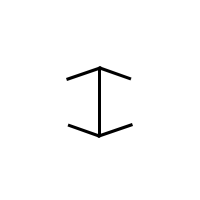

[[-0.43103543]]


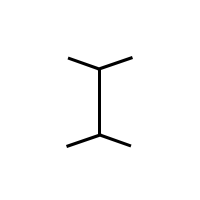

[[-0.24623813]]


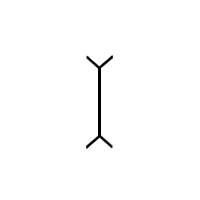

[[-0.3049299]]


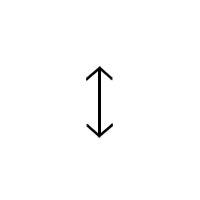

[[-0.39062026]]


In [ ]:
# Muller-lyer figures generalization

PATH = "/content/drive/MyDrive/MLNN/test/"
files = os.listdir(PATH)
i=0

for name in files:
  i+=1
  img = cv2.imread(os.path.join(PATH+str(name)), cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (200,200))
  cv2_imshow(img)
  img = np.array(img).reshape(-1,200,200,1)
  print(model.predict(img))
  if i >= 4:
    break

In [ ]:
# Process images for height approximation test

PATH = "/content/drive/MyDrive/MLNN/validation2/"

test = []
XT = []
YT = []

files = os.listdir(PATH)
i=0

for n in files:
  i+=1
  img_array_t = cv2.imread(os.path.join(PATH+str(n)), cv2.IMREAD_GRAYSCALE)
  measure_t = float(str(n).rstrip(".png"))
  test.append([img_array_t, measure_t])
  if i == 50:
    break
  
for img, measures in test:
  XT.append(img)
  YT.append(measures)

XT = np.array(XT).reshape(-1,200,200,1)
YT = np.array(YT)
YT = scaler.transform(YT.reshape(1,-1))

In [ ]:
# Compare height prediction with actual height

pred = model.predict(XT).flatten()
YT = YT.flatten()
print("Prediction:\n", pred)
print("Ground truth:\n", YT)

print("Correlation:")
print(np.corrcoef(pred, YT)[0,1])

data = [YT, pred]
np.savetxt("data.csv", data, delimiter=",")

Prediction:
 [-1.0533731   0.7948107  -1.587032    0.8218007   0.32047284 -0.22640096
  0.3921166  -1.4263854   0.67553127 -0.8898025  -1.2487627  -0.17984137
  0.37456763 -1.0652755  -0.72023696 -1.1806732  -0.5408427  -1.5543379
 -0.82614833 -1.4331942   1.5971326   0.22477922  1.2505001   0.7132997
 -0.27217254  0.7847468  -1.3994925  -0.4490803   1.1543759  -0.7861312 ]
Ground truth:
 [-0.99725174  0.75132007 -1.52476681  0.89663874  0.38040211 -0.15585718
  0.46290654 -1.40120608  0.70411653 -0.79454009 -1.25422169 -0.12185054
  0.47814575 -1.01683168 -0.6778119  -1.21132834 -0.60048446 -1.55060086
 -0.90883245 -1.3726156   1.65587321  0.30525945  1.23496305  0.75657848
 -0.24821349  0.81919595 -1.33030068 -0.39969976  1.2237338  -0.70619544]
Correlation:
0.9988540990943635


In [ ]:
pred
YT.flatten()

array([-1.00080081, -0.85360562, -1.0103861 ,  0.90267161, -1.07288476,
        0.38959674,  0.47725636, -0.06944474, -1.41811908, -0.37167702,
       -0.43247283, -1.6442282 , -0.43554573, -0.9796706 , -0.09928517,
        0.46132255,  0.92892558, -0.15016627,  1.51878752, -0.63008793])

In [ ]:
from scipy import stats
tStat, pValue =  stats.ttest_rel(pred, YT)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:0.08405625677598438 T-Statistic:1.8231419249033383


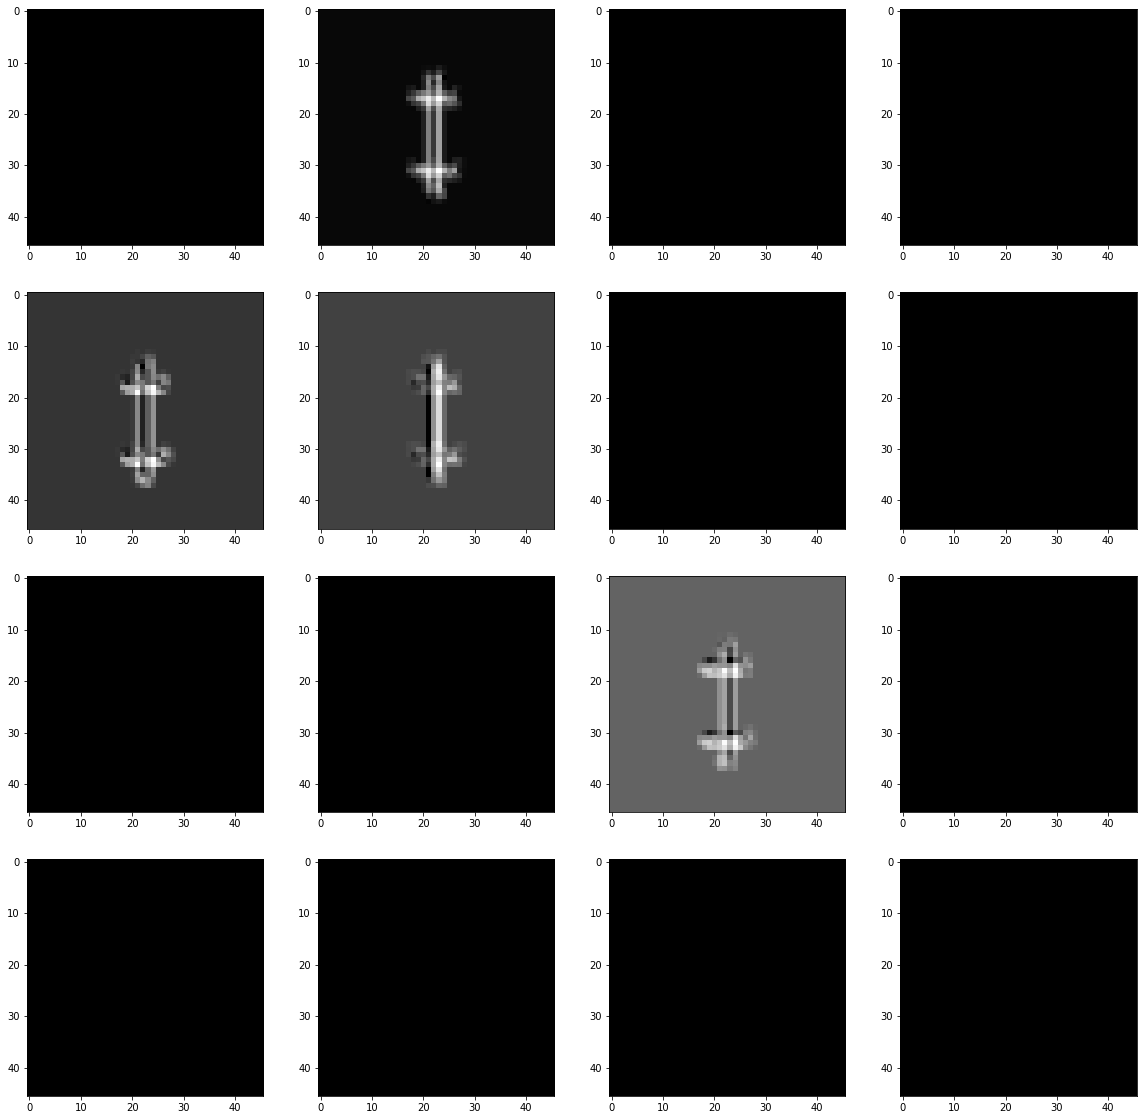

In [ ]:
activation_model = keras.models.Model(inputs=model.inputs, outputs=model.layers[4].output)

#img_path = '/content/drive/MyDrive/MLNN/validation/3.573056.png'
img_path = '/content/drive/MyDrive/MLNN/test/t0.png'
img = keras.preprocessing.image.load_img(img_path, target_size=(200, 200), color_mode="grayscale")
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

activation = activation_model(img_tensor)

plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()